In [13]:
import pandas as pd
hansard = pd.read_csv("/content/hansard_clean.csv")
fca = pd.read_csv("/content/fca_clean.csv")

hansard["Date"] = pd.to_datetime(hansard["Date"])

In [4]:
h_docs = [text.split() for text in hansard["clean_text"]]
f_docs = [text.split() for text in fca["clean_text"]]


In [15]:
hansard["year"] = hansard["Date"].dt.year

yearly_counts = hansard.groupby("year").size()

In [7]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 80.8 MB/s eta 0:00:00


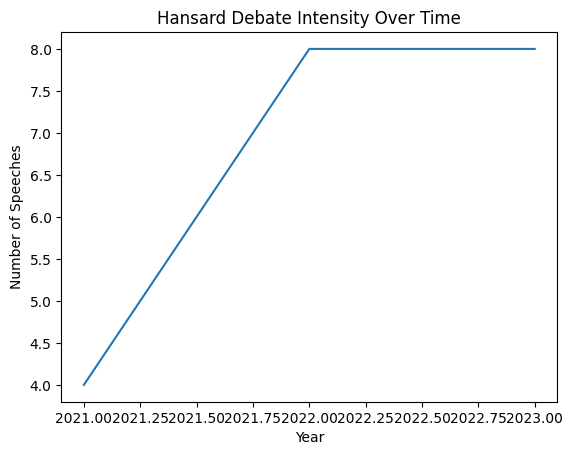

In [17]:
import matplotlib.pyplot as plt
plt.figure()
yearly_counts.plot()
plt.title("Hansard Debate Intensity Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Speeches")
plt.show()

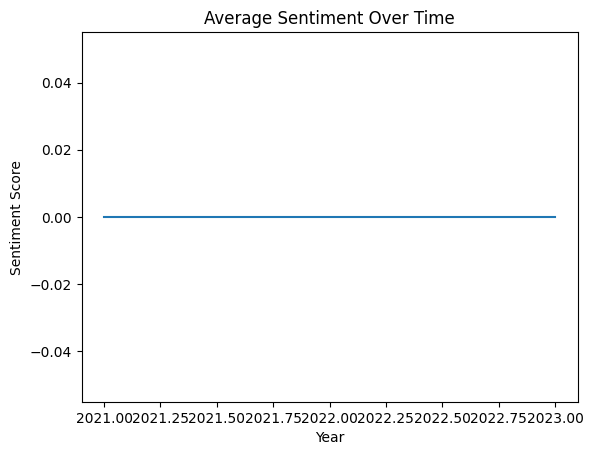

In [19]:
!pip install textblob
from textblob import TextBlob

hansard["sentiment"] = hansard["clean_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

yearly_sentiment = hansard.groupby("year")["sentiment"].mean()

plt.figure()
yearly_sentiment.plot()
plt.title("Average Sentiment Over Time")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.show()